# Benchmark de Algoritmos de Busca em Caminhos em Grafos Implícitos
**Exploração de Busca Cega, Busca Heurística e Programação Dinâmica**

Este projeto investiga diferentes abordagens algorítmicas para resolver um problema de transporte unidimensional. O objetivo é encontrar o custo mínimo para atingir um estado $N$ a partir de um estado inicial $1$, utilizando um conjunto restrito de ações.

**As Regras do Ambiente**:
* Andar (Walk): Move de $i$ para $i+1$ com custo 1.
* Mágica (Magic): Move de $i$ para $2i$ com custo 2.

## Modelagem do Ambiente

Para resolver o problema, o espaço de estados foi modelado através de uma classe que define as transições e os custos. Esta abordagem facilita a separação entre a lógica do problema e a lógica dos algoritmos de busca.

In [ ]:
class TransportationProblem:

    def __init__(self, N):
        """
        Inicializa o problema de transporte com o estado final N.

        Args:
            N (int): Estado final ou objetivo do problema.
        """

        self.N = N


    def startState(self):
        """
        Retorna o estado inicial do problema.

        Returns:
            int: Estado inicial, fixado como 1.
        """

        # O problema inicia na posição 1
        return 1


    def isEnd(self, state):
        """
        Verifica se o estado atual é o estado final (objetivo).

        Args:
            state (int): Estado atual.

        Returns:
            bool: True se o estado atual for igual a N (estado final), caso contrário False.
        """

        # Retorna True se chegamos ao estado objetivo N
        return state == self.N


    def succAndCost(self, state):
        """
        Gera todos os sucessores válidos a partir do estado atual, juntamente com as ações e custos associados.

        Args:
            state (int): Estado atual.

        Returns:
            list of tuples: Lista contendo tuplas no formato (ação, estado_sucessor, custo),
                            onde ação é uma string ('walk' ou 'magic'), estado_sucessor é um int,
                            e custo é um int representando o custo da ação.
        """

        # Lista que guarda os possíveis sucessores do estado "state"
        successors = []

        # Se state é menor que N, é possível andar e chegar no estado: state + 1
        if state < self.N:
            successors.append(('walk', state + 1, 1))

        # Se o dobro do state ainda é menor que N, é possível utilizar o passo mágico e chegar no estado: state * 2
        if state * 2 <= self.N:
            successors.append(('magic', state * 2, 2))

        # Retorna todas as transições válidas a partir de state
        return successors

## Implementação das Estratégias de Busca

Foram implementadas três abordagens clássicas para encontrar o caminho de custo mínimo:

1. **Uniform Cost Search (UCS)**: Uma variante do algoritmo de Dijkstra que garante a otimalidade explorando o nó de menor custo acumulado em um grafo ponderado.

2. **A\* (A-Estrela)**: Uma busca informada que utiliza uma Heurística para guiar o algoritmo, reduzindo o espaço de busca.

3. **Programação Dinâmica (DP)**: Uma abordagem bottom-up que resolve subproblemas menores para construir a solução ideal.

In [ ]:
# Algoritmo: Uniform Cost Search (UCS)
def solution(problem):
    """
    Executa o algoritmo Uniform Cost Search (UCS) para encontrar o caminho de menor custo
    do estado inicial até o estado final do problema dado.

    Args:
        problem (object): Instância de um problema que implementa os métodos
                          startState(), isEnd(state) e succAndCost(state).

    Returns:
        list of tuples: Caminho encontrado para a solução, onde cada elemento é uma tupla
                        (ação, estado_sucessor, custo_da_ação).
                        Retorna uma lista vazia se nenhuma solução for encontrada.
    """

    path = []  # Lista que vai guardar o caminho para a solução
    start = problem.startState()  # Estado inicial do problema (posição 1)

    # Frontier: nós descobertos mas não expandidos ainda
    frontier = [(0, start, [])]  # Tuplas (custo_acumulado, estado_atual, caminho_parcial)

    # Dicionário que guarda o menor custo até determinado nó
    best_cost = {start: 0}

    # Loop de busca
    while frontier:

        # Escolhe o nó de menor custo acumulado
        idx = min(range(len(frontier)), key=lambda i: frontier[i][0])

        # Obtém as informações do nó de menor custo acumulado e o remove da lista de fronteiras
        cost, state, partial = frontier.pop(idx)

        # Verifica se chegou no estado final
        if problem.isEnd(state):
            # Se sim, o caminho final é o caminho parcial do nó e o loop de busca é interrompido
            path = partial
            break

        # Expande sucessores
        for action, nxt, step_cost in problem.succAndCost(state):

            # new_cost = custo até estado + custo da ação para nxt
            new_cost = cost + step_cost

            # Se o estado ainda não foi visitado ou se o novo custo é menor que o melhor custo para tal estado
            if (nxt not in best_cost) or (new_cost < best_cost[nxt]):

                # Atualiza melhor custo até nxt
                best_cost[nxt] = new_cost

                # O caminho para o estado atual se torna o parcial acrescido do caminho explorado no momento
                new_path = partial + [(action, nxt, step_cost)]

                # Adiciona novo nó para futura expansão
                frontier.append((new_cost, nxt, new_path))

    # Retorna o caminho
    return path

In [ ]:
def solutionAstar(problem):
    """
    Executa o algoritmo A* para encontrar o caminho de menor custo do estado inicial até o estado final.
    Utiliza a função heurística para estimar o custo futuro e prioriza os nós na fronteira com base
    na soma do custo acumulado e da heurística.

    Args:
        problem (object): Instância de um problema que implementa os métodos
                          startState(), isEnd(state) e succAndCost(state).

    Returns:
        Lista de tuplas: Caminho encontrado para a solução, onde cada elemento é uma tupla
                        (ação, estado_sucessor, custo_da_ação).
                        Retorna uma lista vazia se nenhuma solução for encontrada.
    """

    path = []  # Lista que vai guardar o caminho para a solução
    start = problem.startState()  # Estado inicial do problema (posição 1)
    N = problem.N  # Estado objetivo

    # Frontier: nós descobertos mas não expandidos ainda
    # Cada tupla: (custo_acumulado + estimativa_custo_futuro, custo_acumulado, estado, caminho_parcial)
    frontier = [(heuristica(start, N), 0, start, [])]

    # Guarda o menor custo até determinado nó
    best_cost = {start: 0}

    # Loop de busca
    while frontier:

        # Escolhe o nó de menor estimativa de custo futuro
        idx = min(range(len(frontier)), key=lambda i: frontier[i][0])

        # Obtém as informações do nó de menor custo acumulado e o remove da lista de fronteiras
        cost_estim, cost, state, partial = frontier.pop(idx)

        # Verifica se chegou no estado final
        if problem.isEnd(state):
            # Se sim, o caminho final é o caminho parcial do nó e o loop de busca é interrompido
            path = partial
            break

        # Expande sucessores
        for action, nxt, step_cost in problem.succAndCost(state):

            # new_cost = custo até state + custo da ação para nxt
            new_cost = cost + step_cost

            # Se o estado ainda não foi visitado ou se o novo custo é menor que o melhor custo para tal estado
            if (nxt not in best_cost) or (new_cost < best_cost[nxt]):

                # Atualiza melhor custo até nxt
                best_cost[nxt] = new_cost

                # new_cost_estim = novo custo até nxt + estimativa de custo futuro a partir de nxt
                new_cost_estim = new_cost + heuristica(nxt, N)

                # O caminho para o estado atual se torna o parcial acrescido do caminho explorado no momento
                new_path = partial + [(action, nxt, step_cost)]

                # Adiciona novo nó para futura expansão
                frontier.append((new_cost_estim, new_cost, nxt, new_path))

    # Retorna o caminho
    return path



def heuristica(state, N):
    """
    Estima o custo futuro mínimo para alcançar o estado objetivo N a partir do estado atual.
    Se o estado atual for maior que metade de N, assume que só é possível andar ('walk') até N,
    retornando a diferença como custo estimado. Caso contrário, retorna 0.

    Args:
        state (int): Estado atual.
        N (int): Estado objetivo.

    Returns:
        int: Estimativa do custo futuro para alcançar o estado final.
    """

    # Se o estado atual é maior que metade de N, não é possível utilizar o passo "magic"
    if state > (N // 2):
        # Então só é possível utilizar o passo "walk", que resulta em uma estimativa de custo futuro de N - state, pois todo o resto do caminho será utilizando "walk"
        return N - state

    # Se a heurística acima não acontece, retornamos uma estimativa nula
    return 0

In [ ]:
def solutionDP(problem):
    """
    Resolve o problema usando programação dinâmica em modo bottom-up para encontrar o caminho
    de custo mínimo do estado inicial ao estado final. Mantém o melhor custo conhecido para cada estado
    e reconstrói o caminho ótimo ao final.

    Args:
        problem (object): Instância de um problema que implementa os métodos
                          startState(), isEnd(state) e succAndCost(state).

    Returns:
        list of tuples: Caminho encontrado para a solução, onde cada elemento é uma tupla
                        (ação, estado_sucessor, custo_da_ação).
                        Retorna uma lista vazia se nenhuma solução for encontrada.
    """

    path = []  # Lista que vai guardar o caminho para a solução
    start = problem.startState()  # Estado inicial (posição 1)
    N = problem.N  # Destino

    # best_cost[i] = custo mínimo conhecido para alcançar o estado i.
    # Inicializa todos como infinito
    best_cost = [float('inf')] * (N + 1)

    # Inicializa o custo do estado inicial como 0
    best_cost[start] = 0

    # parent[estado] armazenará a tupla (ação, estado, custo_da_ação, estado_anterior) que leva ao caminho ótimo para o estado.
    parent = {start: (None, start, 0, None)}

    # Preenchimento bottom-up de 1 até N
    for i in range(start, N + 1):

        # Se best_cost[i] ainda é infinito, não há como chegar em i, então pulamos para i + 1
        if best_cost[i] == float('inf'):
            continue

        # Tenta cada ação a partir de i: 'walk' e 'magic'
        for action, nxt, step_cost in problem.succAndCost(i):

            # new_cost = custo até o estado i + o custo do passo para o estado nxt
            new_cost = best_cost[i] + step_cost

            # Se esse novo custo é melhor, atualiza best_cost e parent
            if new_cost < best_cost[nxt]:
                best_cost[nxt] = new_cost
                parent[nxt] = (action, nxt, step_cost, i)

    # Reconstruindo o caminho de trás(N) para frente(start)
    state = N
    while state != start:

        # Resgata a informação da ação, custo do passo e estado anterior que levou ao estado atual
        action, _, step_cost, prev = parent[state]

        # Adiciona as informações no caminho que está sendo construído
        path.append((action, state, step_cost))

        # Volta ao estado anterior para repetir o mesmo processo
        state = prev

    # Inverte a lista do caminho que foi construída de trás para frente
    path.reverse()

    # Retorna o caminho
    return path

## Análise de Complexidade e Desempenho
Segue abaixo um benchmark comparando o tempo de execução dos três algoritmos conforme o tamanho do estado final $N$ cresce. Isso permite a observação da eficiência teórica na prática.

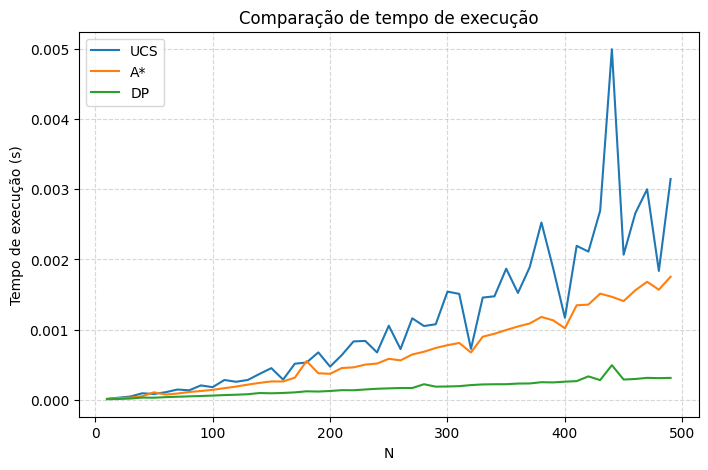

In [ ]:
"""
Executa uma comparação de desempenho entre os algoritmos UCS, A* e Programação Dinâmica (DP)
para resolver instâncias do problema TransportationProblem de diferentes tamanhos N.

Para cada tamanho N na lista Ns, o código:

- Cria uma instância do problema TransportationProblem com estado final N.
- Executa cada os três algoritmos para resolver o problema.
- Mede e armazena o tempo médio de execução de cada algoritmo.
- Ao final, plota um gráfico comparando os tempos de execução em função do tamanho N.

OBS:
- É necessário o uso do comando mágico %timeit (Jupyter/IPython) para medir tempo de execução.
"""

import matplotlib.pyplot as plt


# Lista de tamanhos de problemas que serão resolvidos
Ns = list(range(10, 500, 10))


# Tempos de cada algoritmo
times_ucs, times_astar, times_dp = [], [], []


for N in Ns:

    # Constrói o problema para cada N
    prob = TransportationProblem(N)


    # Executa benchmark comparativo para análise de escalabilidade
    def f_ucs(): solution(prob)
    t = %timeit -n 1 -q -o f_ucs()
    times_ucs.append(t.average)

    def f_astar(): solutionAstar(prob)
    t = %timeit -n 1 -q -o f_astar()
    times_astar.append(t.average)

    def f_dp(): solutionDP(prob)
    t = %timeit -n 1 -q -o f_dp()
    times_dp.append(t.average)


# Plota o gráfico
plt.figure(figsize=(8,5))
plt.plot(Ns, times_ucs,   label='UCS')
plt.plot(Ns, times_astar, label='A*')
plt.plot(Ns, times_dp,    label='DP')
plt.xlabel('N')
plt.ylabel('Tempo de execução (s)')
plt.title('Comparação de tempo de execução')
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.show()

# Extensão: O Problema com Restrição de Estados

Agora, há uma restrição que aumenta a complexidade complexidade: o objetivo continua sendo chegar em $N$, mas agora é **obrigatório passar por pelo menos 3 números ímpares** durante o trajeto.

Isso altera o espaço de estados, que agora deve rastrear não apenas a posição atual, mas também a contagem de ímpares visitados.

## Modelagem do Ambiente

In [ ]:
class RestrictedTransportationProblem:

    def __init__(self, N):
        """
        Inicializa o problema de transporte restrito com o estado final N.

        Args:
            N (int): Estado final ou objetivo do problema.
        """

        self.N = N


    def startState(self):
        """
        Retorna o estado inicial do problema.

        Returns:
            tuple: Estado inicial, que consiste na posição 1 e contagem de números ímpares igual a 1 (pois o próprio 1 é ímpar).
        """

        # Começa em posição 1, e já contamos 1 ímpar (o próprio "1").
        return (1, 1)


    def isEnd(self, state):
        """
        Verifica se o estado atual é o estado final (objetivo) e se a quantidade de números ímpares percorridos é pelo menos 3.

        Args:
            state (tuple): Estado atual no formato (posição, quantidade_de_números_ímpares).

        Returns:
            bool: True se a posição for igual a N e a quantidade de números ímpares for maior ou igual a 3, caso contrário False.
        """

        # State é (pos, odd_count), respectivamente a posição e a quantidade de números ímpares até o estado
        pos, odd_count = state

        # O problema é finalizado quando chegar no estado N e quando a quantidade de números ímpares percorridos for maior que 3
        return (pos == self.N) and (odd_count >= 3)


    def succAndCost(self, state):
        """
        Gera todos os sucessores válidos a partir do estado atual, considerando a posição e a quantidade de números ímpares percorridos,
        juntamente com as ações possíveis e custos associados.

        Args:
            state (tuple): Estado atual no formato (posição, quantidade_de_números_ímpares).

        Returns:
            list of tuples: Lista contendo tuplas no formato (ação, estado_sucessor, custo),
                            onde ação é uma string ('walk' ou 'magic'), estado_sucessor é uma tupla (posição, odd_count),
                            e custo é um int representando o custo da ação.
        """

        # State é (pos, odd_count), respectivamente a posição e a quantidade de números ímpares até o estado
        pos, odd_count = state
        successors = []

        # Se o índice do estado for anterior a N, sempre podemos utilizar o "walk"
        if pos < self.N:

            # Portanto, para encontrar o índice do próximo estado, basta somar 1
            nxt_pos = pos + 1

            # Incrementa odd_count se o próximo pos for ímpar
            nxt_odd = odd_count + (1 if (nxt_pos % 2 == 1) else 0)

            # Adiciona a ação na lista "successors", com o custo 1, conforme determinado pelo problema
            successors.append(('walk', (nxt_pos, nxt_odd), 1))

        # Se o índice do estado multiplicado por 2 for menor ou igual a N, podemos utilizar o "magic"
        if pos * 2 <= self.N:

            # Portanto, para encontrar o índice do próximo estado, basta multiplicar por 2
            nxt_pos = pos * 2

            # Incrementa odd_count se o próximo pos for ímpar
            nxt_odd = odd_count + (1 if (nxt_pos % 2 == 1) else 0)

            # Adiciona a ação na lista "successors", com o custo 2, conforme determinado pelo problema
            successors.append(('magic', (nxt_pos, nxt_odd), 2))

        return successors

## Implementação das Estratégias de Busca

1. **Uniform Cost Search (UCS)**: Se mantém da mesma forma.

2. **A\* (A-Estrela)**: Apenas a heurística muda, para saciar as restrições.

3. **Programação Dinâmica (DP)**: Muda ligeiramente para lidar com as retrições.

In [ ]:
def heuristica(state, N):
    """
    Estima o custo futuro mínimo restante a partir do estado atual até o estado objetivo,
    levando em consideração a restrição de ter pelo menos 3 números ímpares no caminho.

    Parâmetros:
        state: tupla (pos, odd_count) representando a posição atual e quantidade de números ímpares visitados.
        N: inteiro representando o estado final (posição alvo).

    Retorna:
        valor numérico representando a estimativa do custo restante.
    """

    pos, odd_count = state

    # Se há pelo menos 3 números ímpares, a heurística é a mesma do exercício anterior
    if odd_count >= 3:
        if pos > N // 2:
            return N - pos
        return 0

    # Se ainda não há 3 números ímpares, calcula quantos faltam
    odds_needed = 3 - odd_count

    # Estimativa pessimista: assumir que precisaremos andar para conseguir os ímpares restantes e depois chegar até N
    if pos > N // 2:
        # Só podemos andar, então a estimativa é N - pos
        return N - pos
    else:
        # Estimativa simples: distância mínima até N
        return max(0, N - pos)

In [ ]:
def solutionDP(problem):
    """
    Resolve o problema utilizando programação dinâmica, calculando o custo mínimo para cada estado
    (posição e quantidade de números ímpares visitados), e reconstrói o caminho ótimo.

    Parâmetros:
        problem: objeto que representa o problema a ser resolvido, com métodos:
            - startState(): retorna o estado inicial
            - N: estado objetivo (posição final)
            - succAndCost(state): retorna lista de (ação, próximo_estado, custo)

    Retorna:
        path: lista de tuplas (ação, estado, custo) que compõem o caminho ótimo,
              ou lista vazia se não houver solução.
    """

    path = []
    start = problem.startState()
    N = problem.N

    # best_cost[(pos, odd_count)] = custo mínimo para alcançar posição pos com odd_count ímpares visitados
    best_cost = {}
    best_cost[start] = 0

    # parent[(pos, odd_count)] armazenará a tupla (ação, estado, custo_da_ação, estado_anterior)
    parent = {start: (None, start, 0, None)}

    # Processamento de 1 até N
    for pos in range(1, N + 1):
        for odd_count in range(1, 3 + 1):  # odd_count de 1 a 3, pois "3 ou mais" não difere de 3

            # Construção do estado atual
            current_state = (pos, odd_count)

            # Se current_state não está presente em best_cost, não há como chegar nele
            if current_state not in best_cost:
                continue

            # Tenta cada ação a partir do estado atual
            for action, nxt, step_cost in problem.succAndCost(current_state):

                # O novo custo é o custo do estado atual mais o custo do passo para o próximo estado
                new_cost = best_cost[current_state] + step_cost

                # Se o estado nxt não está em best_cost ou se o novo custo é menor, atualiza a lista de best_cost e adiciona na lista parent
                if nxt not in best_cost or new_cost < best_cost[nxt]:
                    best_cost[nxt] = new_cost
                    parent[nxt] = (action, nxt, step_cost, current_state)

    # Filtra os estados finais que satisfazem as condições descritas no problema
    final_states = [(pos, odd_count) for pos, odd_count in best_cost.keys() if pos == N and odd_count >= 3]

    # Se nenhum estado satisfazer as condições
    if not final_states:
        path = []   # Não há solução
        return path

    # Escolhe o estado final com menor custo
    final_state = min(final_states, key=lambda s: best_cost[s])

    # Reconstrói o caminho
    state = final_state

    # Itera enquanto o estado não chegar no inicial
    while state != start:

        # Obtém informações do estado
        action, _, step_cost, prev = parent[state]

        # Adiciona na lista path
        path.append((action, state, step_cost))

        # Acessa o estado anterior
        state = prev

    # Inverte a ordem de path para pegar o caminho de start até N
    path.reverse()

    # Retorna o caminho
    return path

## Análise de Complexidade e Desempenho

In [ ]:
"""
Executa o problema RestrictedTransportationProblem com tamanho 15 usando três algoritmos de busca:
- Uniform Cost Search (UCS)
- A*
- Programação Dinâmica (DP)

Imprime o caminho solução encontrado por cada algoritmo, onde cada passo é exibido na forma:
(ação, (estado, qtd_impares), custo)
"""

problem = RestrictedTransportationProblem(15)

print("(ação, (estado, qtd_impares), custo)")

print("UCS:")
print(*solution(problem), sep='\n')

print("\nA*:")
print(*solutionAstar(problem), sep='\n')

print("\nDP:")
print(*solutionDP(problem), sep='\n')


(ação, (estado, qtd_impares), custo)
UCS:
('walk', (2, 1), 1)
('walk', (3, 2), 1)
('magic', (6, 2), 2)
('walk', (7, 3), 1)
('magic', (14, 3), 2)
('walk', (15, 4), 1)

A*:
('walk', (2, 1), 1)
('walk', (3, 2), 1)
('magic', (6, 2), 2)
('walk', (7, 3), 1)
('magic', (14, 3), 2)
('walk', (15, 4), 1)

DP:
('walk', (2, 1), 1)
('walk', (3, 2), 1)
('magic', (6, 2), 2)
('walk', (7, 3), 1)
('magic', (14, 3), 2)
('walk', (15, 4), 1)


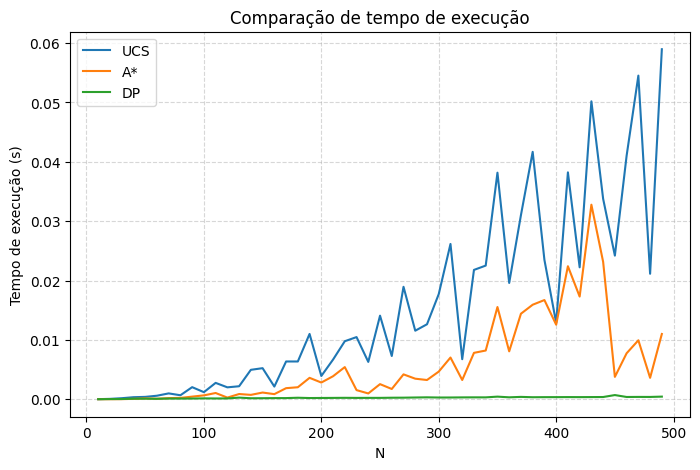

In [ ]:
"""
Executa uma análise de desempenho comparando os tempos de execução dos algoritmos UCS, A* e Programação Dinâmica (DP)
para diferentes tamanhos de problema no RestrictedTransportationProblem.

Para cada valor de N na faixa de 10 a 490 (incrementos de 10), o código:
- Cria uma instância do problema com tamanho N,
- Mede o tempo médio de execução de cada algoritmo usando o %timeit do IPython,
- Armazena os tempos para posterior comparação.

Por fim, plota um gráfico comparando os tempos dos três algoritmos em função do tamanho do problema N.
"""

import matplotlib.pyplot as plt


# Lista de tamanhos de problemas que serão resolvidos
Ns = list(range(10, 500, 10))

# Tempos de cada algoritmo
times_ucs, times_astar, times_dp = [], [], []

# Para cada tamanho de problema
for N in Ns:

    # Constrói o problema para cada N
    prob = RestrictedTransportationProblem(N)


    # Executa benchmark comparativo para análise de escalabilidade
    def f_ucs(): solution(prob)
    t = %timeit -n 1 -q -o f_ucs()
    times_ucs.append(t.average)

    def f_astar(): solutionAstar(prob)
    t = %timeit -n 1 -q -o f_astar()
    times_astar.append(t.average)

    def f_dp(): solutionDP(prob)
    t = %timeit -n 1 -q -o f_dp()
    times_dp.append(t.average)


# Plota o gráfico
plt.figure(figsize=(8,5))
plt.plot(Ns, times_ucs,   label='UCS')
plt.plot(Ns, times_astar, label='A*')
plt.plot(Ns, times_dp,    label='DP')
plt.xlabel('N')
plt.ylabel('Tempo de execução (s)')
plt.title('Comparação de tempo de execução')
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.show()

# Conclusão e Análise de Resultados

Após a implementação e a análise de desempenho dos diferentes algoritmos para resolver o problema de transporte (tanto na versão original quanto na restrita), chegamos às seguintes conclusões:
* Eficiência Superior da Programação Dinâmica (DP): O algoritmo de Programação Dinâmica mostrou-se o mais eficiente entre todos os testados. Ao decompor o problema em subproblemas menores e armazenar seus resultados, a DP evita o custo de reexploração de estados, apresentando um tempo de execução significativamente menor e mais estável à medida que $N$ cresce.
* Vantagem da Busca Informada (A*): Comparando os algoritmos de busca, o A* superou o Uniform Cost Search (UCS) em termos de velocidade. Isso se deve ao uso da função heurística, que fornece uma estimativa do custo futuro e permite que o A* direcione sua busca de forma mais inteligente para o objetivo, expandindo menos nós do que a busca cega do UCS.
* Escalabilidade: Os gráficos de benchmark confirmam que, para valores elevados de $N$, a Programação Dinâmica é a escolha ideal pela sua complexidade reduzida, enquanto o A* se destaca como a melhor opção de busca quando uma heurística admissível está disponível.